# ATP Tennis Data - ???



### Results from Best Model



# Summary of Results




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.decomposition import PCA
from datetime import datetime
import pickle
import json
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from util import jupyter_util as ju
from util.model_util import ModelWrapper, REPORT_FILE, RSTATE, N_JOBS, MAX_ITER, LABEL_COL

%matplotlib inline
sns.set()


# date
DATE_FORMAT = '%Y-%m-%d'
DATE = datetime.now().strftime(DATE_FORMAT)

DESCRIPTION = "ohe-history_diff-matchup_diff"


# update this
FEATURE_FILE = f'../datasets/atp_matches_1985-2019_features-ohe-history5-matchup5.csv'

START_YEAR = 1998
END_YEAR = 2018




In [2]:
X_train, X_test, y_train, y_test = ju.get_data(FEATURE_FILE, LABEL_COL, START_YEAR, END_YEAR)

Our dataset actually has both historical data as well as matchup data. We will remove the matchup columns from the dataset

In [3]:
import re

def filter_features(data: pd.DataFrame):
    history_columns = [col for col in data.columns if re.search('history', col) and not re.search('diff', col)]
    print(f'Before: data.shape {data.shape}')
    data = data.drop(history_columns, axis=1)

    # drop all columns that doesn't have diff
    matchup_columns = [col for col in data.columns if re.search('matchup', col) and not re.search('diff', col)]
    data = data.drop(matchup_columns, axis=1)

    print(f'After: data.shape {data.shape}')
    
    return data
    
X_train = filter_features(X_train)
X_test = filter_features(X_test)

Before: data.shape (44429, 5299)
After: data.shape (44429, 5265)
Before: data.shape (14810, 5299)
After: data.shape (14810, 5265)


In [4]:
[col for col in X_train.columns if re.search('matchup|history', col)]

['p1_history_win_percentage_diff',
 'p1_history_games_won_percentage_diff',
 'p1_history_sets_won_percentage_diff',
 'p1_history_wins_diff',
 'p1_history_losses_diff',
 'p1_matchup_wins_diff',
 'p1_matchup_games_diff',
 'p1_matchup_sets_diff']

# Logistic Regression

In [5]:

# train our model

lr = ModelWrapper(LogisticRegression(n_jobs = N_JOBS, verbose = 1, random_state = RSTATE),
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                   X_train = X_train,
                   y_train = y_train,
                   X_test = X_test,
                   y_test = y_test).fit()
y_predict_lr = lr.predict()

/Users/vinceluk/anaconda3/envs/capstone2/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/vinceluk/anaconda3/envs/capstone2/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[LibLinear]

Model Score: 0.6632680621201891

ROC/AUC Score: 0.6632669321968055
              precision    recall  f1-score   support

        Loss       0.66      0.66      0.66      7381
         Win       0.66      0.66      0.66      7429

    accuracy                           0.66     14810
   macro avg       0.66      0.66      0.66     14810
weighted avg       0.66      0.66      0.66     14810

      Loss   Win
Loss  4893  2488
Win   2499  4930


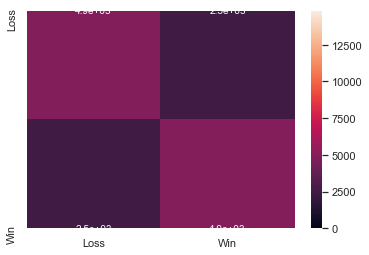

In [6]:
lr.analyze()

In [7]:
# ju.plot_2d(X_test, y_predict_lr)

In [8]:
lr.save()

Saving report: ../reports/summary.csv


# KNN

In [9]:

# train our model

knn = ModelWrapper(KNeighborsClassifier(n_jobs = N_JOBS),
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                   X_train = X_train,
                   y_train = y_train,
                   X_test = X_test,
                   y_test = y_test).fit()
y_predict_knn = knn.predict()

Model Score: 0.6098582039162728

ROC/AUC Score: 0.6098742393534282
              precision    recall  f1-score   support

        Loss       0.61      0.61      0.61      7381
         Win       0.61      0.60      0.61      7429

    accuracy                           0.61     14810
   macro avg       0.61      0.61      0.61     14810
weighted avg       0.61      0.61      0.61     14810

      Loss   Win
Loss  4538  2843
Win   2935  4494


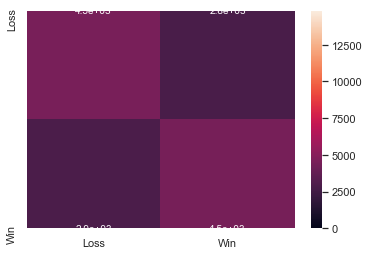

In [10]:
knn.analyze()

In [11]:
# ju.plot_2d(X_test, y_predict_knn)

In [12]:
knn.save()

Saving report: ../reports/summary.csv


# Decision Tree

In [13]:

# train our model

dt = ModelWrapper(DecisionTreeClassifier(random_state = RSTATE),
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                   X_train = X_train,
                   y_train = y_train,
                   X_test = X_test,
                   y_test = y_test).fit()
y_predict_dt = dt.predict()

Model Score: 0.6016880486158002

ROC/AUC Score: 0.6016897733352502
              precision    recall  f1-score   support

        Loss       0.60      0.60      0.60      7381
         Win       0.60      0.60      0.60      7429

    accuracy                           0.60     14810
   macro avg       0.60      0.60      0.60     14810
weighted avg       0.60      0.60      0.60     14810

      Loss   Win
Loss  4445  2936
Win   2963  4466


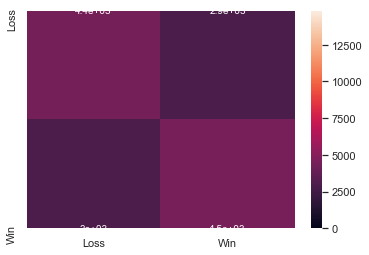

In [14]:
dt.analyze()

In [15]:
# ju.plot_2d(X_test, y_predict_dt)

In [16]:
dt.save()

Saving report: ../reports/summary.csv


# Random Forest Classifier

In [17]:

# train our model

rf = ModelWrapper(RandomForestClassifier(random_state=RSTATE, verbose=1),
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                   X_train = X_train,
                   y_train = y_train,
                   X_test = X_test,
                   y_test = y_test).fit()
y_predict_rf = rf.predict()

/Users/vinceluk/anaconda3/envs/capstone2/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    6.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished


Model Score: 0.6457123565158677

ROC/AUC Score: 0.6459347012805998
              precision    recall  f1-score   support

        Loss       0.63      0.71      0.67      7381
         Win       0.67      0.58      0.62      7429

    accuracy                           0.65     14810
   macro avg       0.65      0.65      0.64     14810
weighted avg       0.65      0.65      0.64     14810

      Loss   Win
Loss  5274  2107
Win   3140  4289


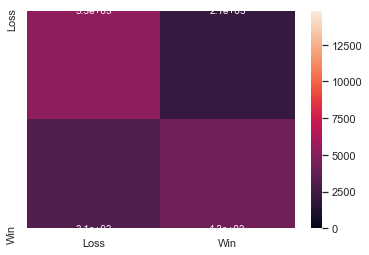

In [18]:
rf.analyze()

In [19]:
# ju.plot_2d(X_test, y_predict_rf)

In [20]:
rf.save()

Saving report: ../reports/summary.csv


# Gradient Boosting

In [21]:

# train our model

gb = ModelWrapper(GradientBoostingClassifier(random_state=RSTATE, verbose=1, n_iter_no_change = 4),
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                   X_train = X_train,
                   y_train = y_train,
                   X_test = X_test,
                   y_test = y_test).fit()
y_predict_gb = gb.predict()

      Iter       Train Loss   Remaining Time 
         1           1.3661            8.94m
         2           1.3496            8.81m
         3           1.3353            8.77m
         4           1.3232            8.73m
         5           1.3127            8.68m
         6           1.3035            8.59m
         7           1.2961            8.50m
         8           1.2882            8.40m
         9           1.2816            8.31m
        10           1.2760            8.22m
        20           1.2299            7.22m
        30           1.2032            6.46m
        40           1.1814            5.55m
        50           1.1694            4.58m
        60           1.1602            3.67m
        70           1.1550            2.74m
        80           1.1521            1.82m
        90           1.1487           54.34s
       100           1.1436            0.00s


Model Score: 0.6885887913571911

ROC/AUC Score: 0.6885631979852297
              precision    recall  f1-score   support

        Loss       0.69      0.68      0.69      7381
         Win       0.69      0.70      0.69      7429

    accuracy                           0.69     14810
   macro avg       0.69      0.69      0.69     14810
weighted avg       0.69      0.69      0.69     14810

      Loss   Win
Loss  5024  2357
Win   2255  5174


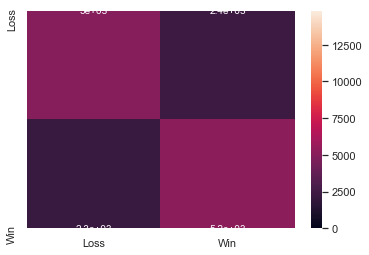

In [22]:
gb.analyze()

In [23]:
# ju.plot_2d(X_test, y_predict_gb)

In [24]:
gb.save()

Saving report: ../reports/summary.csv


# AdaBoost

In [25]:
ab = ModelWrapper(AdaBoostClassifier(random_state=RSTATE),
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                   X_train = X_train,
                   y_train = y_train,
                   X_test = X_test,
                   y_test = y_test).fit()
y_predict_ab = ab.predict()

Model Score: 0.6689399054692775

ROC/AUC Score: 0.668875807903311
              precision    recall  f1-score   support

        Loss       0.67      0.65      0.66      7381
         Win       0.66      0.69      0.68      7429

    accuracy                           0.67     14810
   macro avg       0.67      0.67      0.67     14810
weighted avg       0.67      0.67      0.67     14810

      Loss   Win
Loss  4791  2590
Win   2313  5116


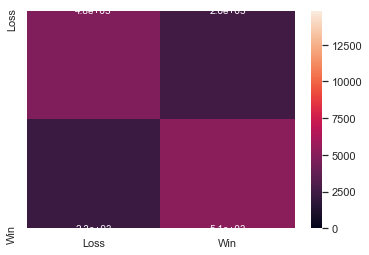

In [26]:
ab.analyze()

In [27]:
# ju.plot_2d(X_test, y_predict_ab)

In [28]:
ab.save()

Saving report: ../reports/summary.csv


# Results

In [29]:
report = pd.read_csv(REPORT_FILE)
report.tail(6)

,model_name,description,data_file,start_year,end_year,accuracy,roc_auc_score,confusion_matrix,classification_report,model_file,predict_time_min,fit_time_min,total_time_min
102,LogisticRegression,ohe-history_diff-matchup_diff,../datasets/atp_matches_1985-2019_features-ohe...,1998,2018,0.663268,0.663267,"{""0"": {""0"": 4893, ""1"": 2499}, ""1"": {""0"": 2488,...","{""Loss"": {""precision"": 0.6619318181818182, ""re...",../models/logisticregression-1998-2018-ohe-his...,0.0,0.0,0.0
103,KNeighborsClassifier,ohe-history_diff-matchup_diff,../datasets/atp_matches_1985-2019_features-ohe...,1998,2018,0.609858,0.609874,"{""0"": {""0"": 4538, ""1"": 2935}, ""1"": {""0"": 2843,...","{""Loss"": {""precision"": 0.6072527766626522, ""re...",../models/kneighborsclassifier-1998-2018-ohe-h...,0.0,0.0,0.0
104,DecisionTreeClassifier,ohe-history_diff-matchup_diff,../datasets/atp_matches_1985-2019_features-ohe...,1998,2018,0.601688,0.601690,"{""0"": {""0"": 4445, ""1"": 2963}, ""1"": {""0"": 2936,...","{""Loss"": {""precision"": 0.6000269978401728, ""re...",../models/decisiontreeclassifier-1998-2018-ohe...,0.0,0.0,0.0
105,RandomForestClassifier,ohe-history_diff-matchup_diff,../datasets/atp_matches_1985-2019_features-ohe...,1998,2018,0.645712,0.645935,"{""0"": {""0"": 5274, ""1"": 3140}, ""1"": {""0"": 2107,...","{""Loss"": {""precision"": 0.6268124554314238, ""re...",../models/randomforestclassifier-1998-2018-ohe...,0.0,0.0,0.0
106,GradientBoostingClassifier,ohe-history_diff-matchup_diff,../datasets/atp_matches_1985-2019_features-ohe...,1998,2018,0.688589,0.688563,"{""0"": {""0"": 5024, ""1"": 2255}, ""1"": {""0"": 2357,...","{""Loss"": {""precision"": 0.6902046984475889, ""re...",../models/gradientboostingclassifier-1998-2018...,0.0,9.0,9.0
107,AdaBoostClassifier,ohe-history_diff-matchup_diff,../datasets/atp_matches_1985-2019_features-ohe...,1998,2018,0.668940,0.668876,"{""0"": {""0"": 4791, ""1"": 2313}, ""1"": {""0"": 2590,...","{""Loss"": {""precision"": 0.6744087837837838, ""re...",../models/adaboostclassifier-1998-2018-ohe-his...,0.0,1.0,1.0


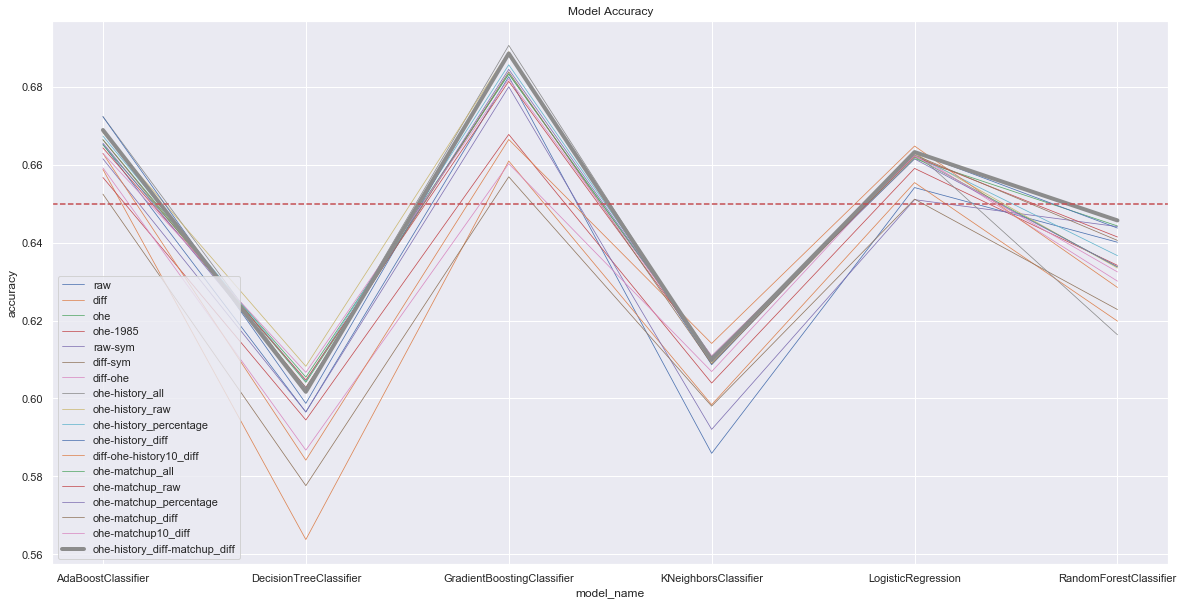

In [30]:
f, a = plt.subplots(1, 1, figsize=(20, 10))

descs = report.description.unique()

for desc in descs:
    report_desc = report[report.description == desc]
    if desc == DESCRIPTION:
        sns.lineplot(x="model_name", y="accuracy", data=report_desc, label=desc, linewidth=4)
    else:
        sns.lineplot(x="model_name", y="accuracy", data=report_desc, label=desc, linewidth=0.75)

a.axhline(0.65, ls='--', color='r')
a.set_title(f"Model Accuracy")
_ = a.legend(loc="lower left")

Best Model: GradientBoostingClassifier


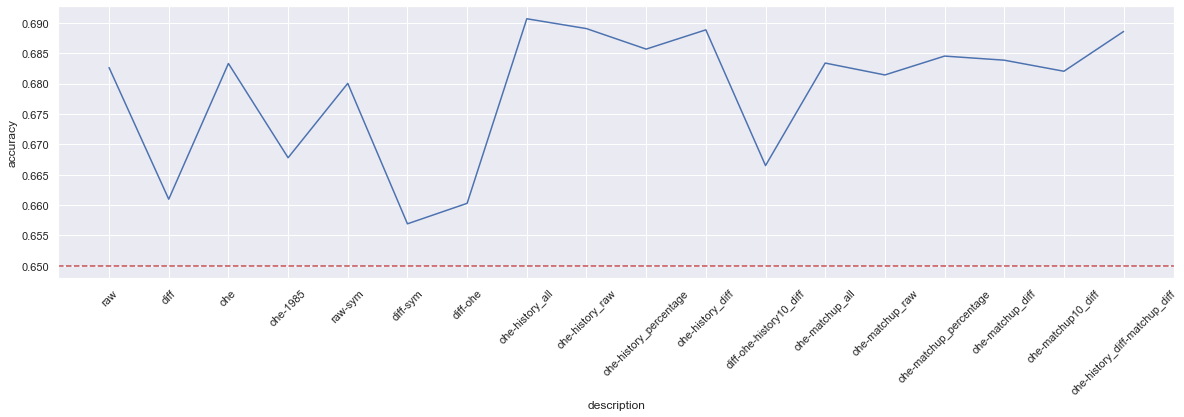

In [31]:
best_model = report.loc[report[report.description == DESCRIPTION].accuracy.idxmax()].model_name
print(f'Best Model: {best_model}')

dt_report = report[(report.model_name == best_model)]

f, a = plt.subplots(1, 1, figsize=(20, 5))
_ = sns.lineplot(x="description", y="accuracy", data=dt_report, ax=a, sort=False)
_ = a.axhline(0.65, ls='--', color='r')
_ = a.set_label(f"{best_model} Accuracy")
_ = plt.xticks(rotation=45)


In [32]:

current_report = report[(report.model_name == best_model) &
                                  (report.description == DESCRIPTION)]
mw = ModelWrapper.get_model_wrapper_from_report(current_report)


In [33]:
import shap

shap.initjs()

explainer = shap.TreeExplainer(mw.model, data=X_train.values)
shap_values = explainer.shap_values(X_test.values)

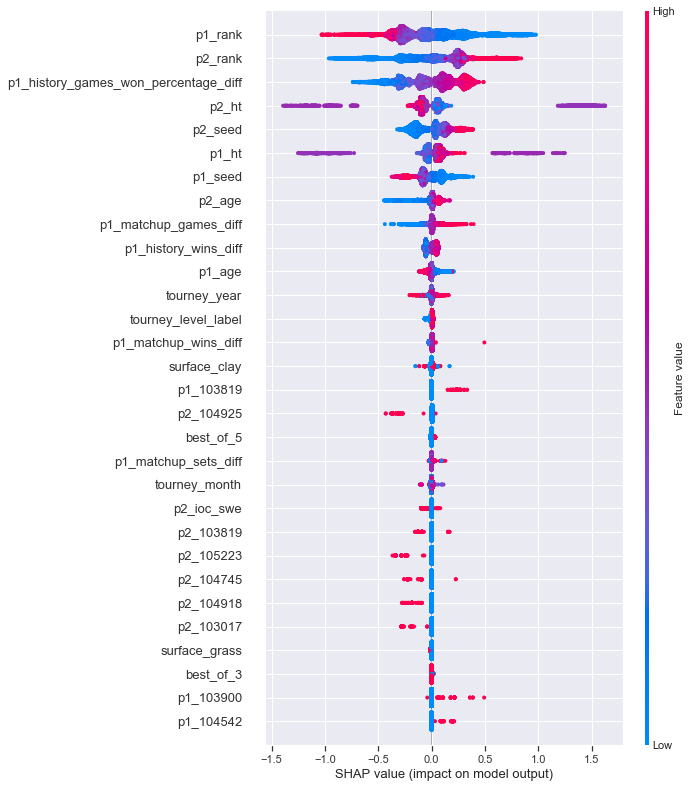

In [34]:
shap.summary_plot(shap_values, X_test, max_display=30)

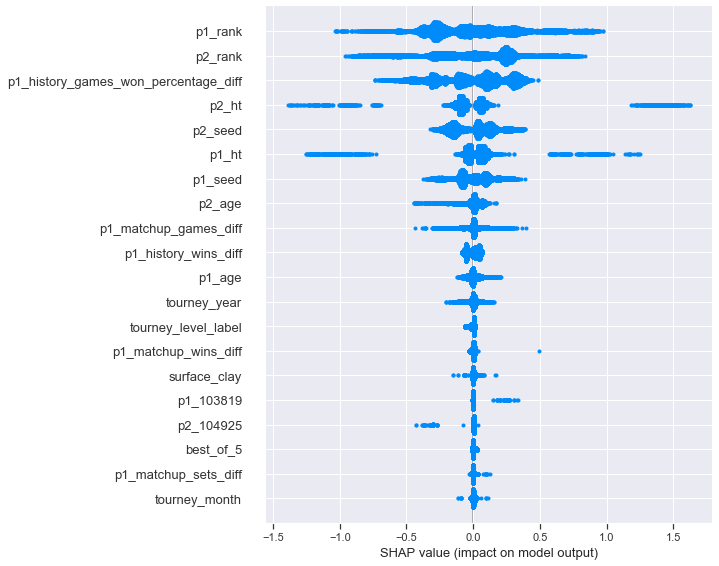

In [35]:
shap.summary_plot(shap_values, feature_names=X_test.columns, title="Feature Importance")

In [36]:
print(f'Last Finished: {datetime.now().strftime("%Y-%m-%d %H:%M")}')

Last Finished: 2019-10-21 05:21
